In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')       
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
#change column name to lowercase so its easier to read
df.columns = df.columns.str.lower()

print(df.columns)

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')


## Lets start with "Data Preprocessing"
- Remove Null Values if exists
- Remove unnecessary columns
- Remove Duplicated Rows in exists
- Change values in certain columns if needed

In [5]:
df.isnull().sum()

ordernumber            0
quantityordered        0
priceeach              0
orderlinenumber        0
sales                  0
orderdate              0
status                 0
qtr_id                 0
month_id               0
year_id                0
productline            0
msrp                   0
productcode            0
customername           0
phone                  0
addressline1           0
addressline2        2521
city                   0
state               1486
postalcode            76
country                0
territory           1074
contactlastname        0
contactfirstname       0
dealsize               0
dtype: int64

# Remove unwanted columns
- columns have alot of null values
- columns are not needed in analysis
- columns are redundant and can be caluclated from other columns

In [6]:
#list of columns to be dropped 
columns_to_drop = ['addressline2', 'territory', 'state', 'city', 'orderdate', 'contactlastname','contactfirstname',
                   'postalcode', 'msrp' ,'qtr_id' , 'productcode', 'addressline1', 'phone']


df = df.drop(columns=columns_to_drop)

In [7]:
df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'status', 'month_id', 'year_id', 'productline', 'customername',
       'country', 'dealsize'],
      dtype='object')

In [8]:
df.isnull().sum()

ordernumber        0
quantityordered    0
priceeach          0
orderlinenumber    0
sales              0
status             0
month_id           0
year_id            0
productline        0
customername       0
country            0
dealsize           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
#see the unique values in status column
df['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [11]:
#change the values in the columns to 'shipped' and 'notshipped'
#so its easier in prediction models when its binary classification model
df.replace({'Disputed':'notshipped',
            'In Process':'notshipped',
            'Cancelled':'notshipped',
            'On Hold':'notshipped',
            'Resolved':'notshipped'}, inplace=True)

df['status'].unique()

array(['Shipped', 'notshipped'], dtype=object)

# Visalization
Visualize the dataset for better understanding

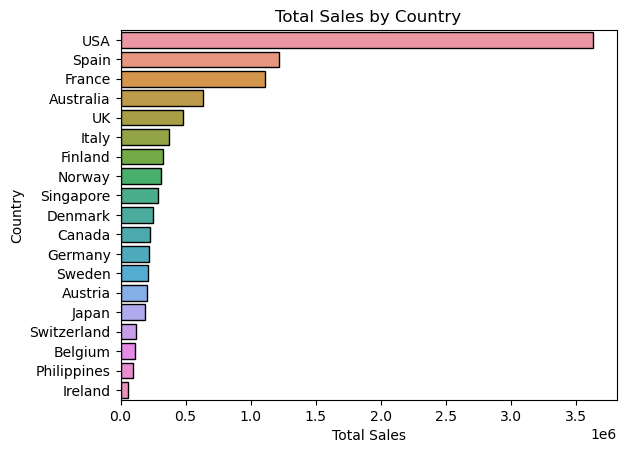

In [13]:
#Group and Order the total sales of each country
country_sales = df.groupby('country')['sales'].sum().reset_index()
country_sales_sorted = country_sales.sort_values(by='sales', ascending=False)

#horizontal barplot 
sns.barplot(y='country', x='sales', data=country_sales_sorted, edgecolor='black')
plt.title('Total Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

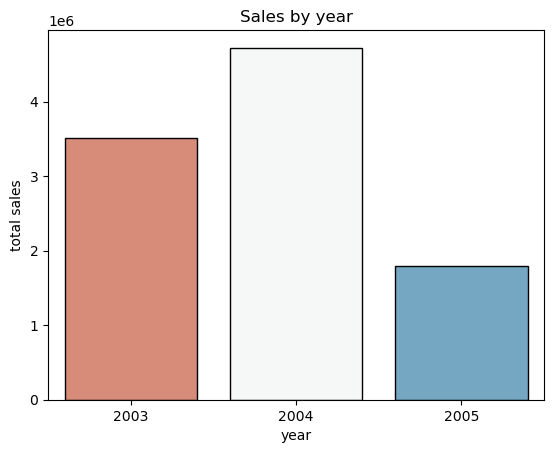

In [14]:
year_sales = df.groupby('year_id')['sales'].sum().reset_index()
year_sales_sorted = year_sales.sort_values(by='sales', ascending=False)

sns.barplot(y='sales', x='year_id', data=year_sales_sorted, edgecolor='black', palette='RdBu')
plt.title('Sales by year')
plt.xlabel('year')
plt.ylabel('total sales')
plt.show()

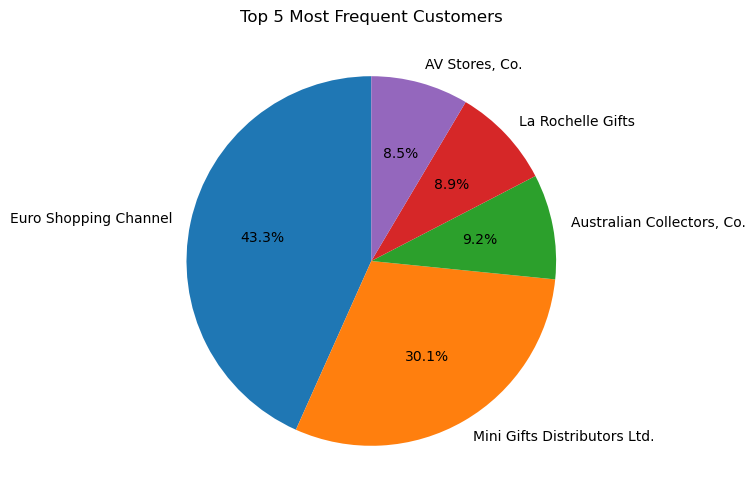

In [15]:
top_5_customers = df['customername'].value_counts().head(5)
# Plot using matplotlib
plt.figure(figsize=(10, 6))
top_5_customers.plot(kind='pie' ,autopct='%1.1f%%',startangle=90)
plt.ylabel('')  # Optional: Remove the default ylabel
plt.title('Top 5 Most Frequent Customers')
plt.show()

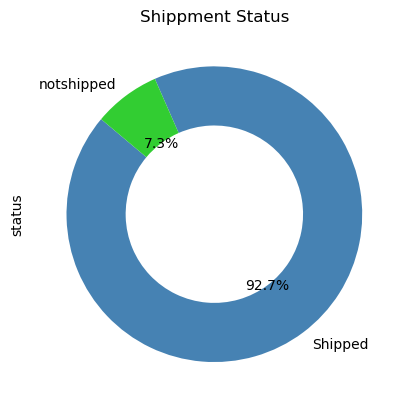

In [20]:
colors = ['#4682b3','#32cd32']
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors,  wedgeprops=dict(width=0.4))
plt.title('Shippment Status')
plt.show()

In [18]:
df.dtypes

ordernumber          int64
quantityordered      int64
priceeach          float64
orderlinenumber      int64
sales              float64
status              object
month_id             int64
year_id              int64
productline         object
customername        object
country             object
dealsize            object
dtype: object

# Use Label Encoder
change all the objects types to be numeric is the dataset can be fitted in a machine learning model

In [21]:
#preforming label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['status'] = encoder.fit_transform(df['status'])
df['productline'] = encoder.fit_transform(df['productline'])
df['country'] = encoder.fit_transform(df['country'])
df['dealsize'] = encoder.fit_transform(df['dealsize'])
df['customername'] = encoder.fit_transform(df['customername'])

In [22]:
df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,status,month_id,year_id,productline,customername,country,dealsize
0,10107,30,95.70,2,2871.00,0,2,2003,1,45,18,2
1,10121,34,81.35,5,2765.90,0,5,2003,1,66,6,2
2,10134,41,94.74,2,3884.34,0,7,2003,1,46,6,1
3,10145,45,83.26,6,3746.70,0,8,2003,1,85,18,1
4,10159,49,100.00,14,5205.27,0,10,2003,1,23,18,1


In [23]:
df.dtypes

ordernumber          int64
quantityordered      int64
priceeach          float64
orderlinenumber      int64
sales              float64
status               int32
month_id             int64
year_id              int64
productline          int32
customername         int32
country              int32
dealsize             int32
dtype: object

# Heat Map
to check the correlation between each feature so i can dimensionality reduction so if there is two features having high correlation we can remove one of them because this mean that they are highly similar and one can replace the other.

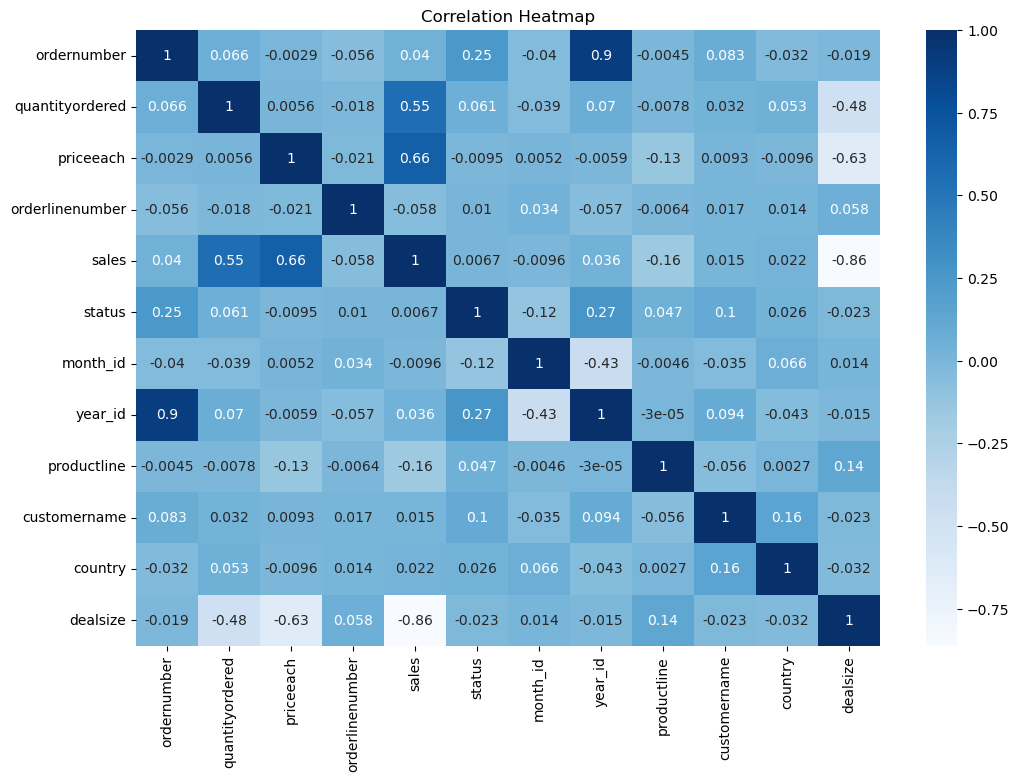

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='Blues', annot = True)
plt.title('Correlation Heatmap')
plt.show()